# Exploring the evolution of Linux
## 1. Introduction

Version control repositories like CVS, Subversion or Git can be a real gold mine for software developers. They contain every change to the source code including the date (the "when"), the responsible developer (the "who"), as well as little message that describes the intention (the "what") of a change.

![Tux - the Linux mascot](img/04_tux.png)

In this notebook, we will analyze the evolution of a very famous open-source project – the Linux kernel. The Linux kernel is the heart of some Linux distributions like Debian, Ubuntu or CentOS.

We get some first insights into the work of the development efforts by

* identifying the TOP 10 contributors and
* visualizing the commits over the years.

Linus Torvalds, the (spoiler alert!) main contributor to the Linux kernel (and also the creator of Git), created a [mirror of the Linux repository on GitHub](https://github.com/torvalds/linux/). It contains the complete history of kernel development for the last 13 years.

For our analysis, we will use a Git log file with the following content:

### Instructions

Print out the raw data in the Git log file to show the available format.

* Print out the content of the sample file **datasets/git_log_excerpt.csv**.

**Good to know**

This Project requires that you know your way around Python and Pandas. We recommend that you have complete these DataCamp courses before doing this project:

* [Intro to Python for Data Science](https://www.datacamp.com/courses/intro-to-python-for-data-science)
* [Pandas Foundations](https://www.datacamp.com/courses/pandas-foundations)

It can also be helpful to take a look at [this exercise from Manipulating Time Series Data in Python](https://campus.datacamp.com/courses/manipulating-time-series-data-in-python/working-with-time-series-in-pandas?ex=4) to learn how to create timestamp columns in DataFrames.

In [1]:
with open('datasets/git_log_excerpt.csv') as f:
    read_data = f.read()
print(read_data)

1502382966#Linus Torvalds
1501368308#Max Gurtovoy
1501625560#James Smart
1501625559#James Smart
1500568442#Martin Wilck
1502273719#Xin Long
1502278684#Nikolay Borisov
1502238384#Girish Moodalbail
1502228709#Florian Fainelli
1502223836#Jon Paul Maloy


## 2. Reading in the dataset

The dataset was created by using the command git log --encoding=latin-1 --pretty="%at#%aN". The latin-1 encoded text output was saved in a header-less csv file. In this file, each row is a commit entry with the following information:

* **timestamp**: the time of the commit as a UNIX timestamp in seconds since 1970-01-01 00:00:00 (Git log placeholder "%at")
* **author**: the name of the author that performed the commit (Git log placeholder "%aN")

The columns are separated by the number sign #. The complete dataset is in the datasets/ directory. It is a gz-compressed csv file named git_log.gz.

### Instructions

Read in the Linux Git log file with Pandas.

* Load in the **pandas** module as pd.
* Read in the log file **datasets/git_log.gz** and assign the resulting DataFrame to **git_log**. Name the first column **"timestamp"** and the second column **"author"**.
* Print out the first rows of git_log.

The **pandas** method **read_csv** can automatically read a csv file compressed into a **gz** file. To read in the data correctly, you will have to specify the **sep**, **encoding**, **header**, and **names** arguments to **read_csv**. The **compression** parameter is optional because its default value is set to **infer**. This will derive the right decompression algorithm from the file's extension.

In [2]:
# Loading in the pandas module
import pandas as pd

# Reading in the log file
git_log = pd.read_csv('datasets/git_log.bz', 
                      sep='#', 
                      encoding='latin-1', 
                      header=None, 
                      names=['timestamp', 'author'])

# Printing out the first 5 rows
git_log.head(5)

,timestamp,author
0,1502826583,Linus Torvalds
1,1501749089,Adrian Hunter
2,1501749088,Adrian Hunter
3,1501882480,Kees Cook
4,1497271395,Rob Clark


## 3. Getting an overview

The dataset contains the information about every single code contribution (a "commit") to the Linux kernel over the last 13 years. We'll first take a look at the number of authors and their commits to the repository.

### Instructions

Gather some basic metrics about Linux's Git repository.

* Count the number of commits in **git_log**.
* Count the number of all contributing authors. Leave out the entries that don't have an author at all.

Here, use some basic functions of Python, Pandas' **DataFrame** and **Series** to count values and to remove missing data.

In [3]:
# calculating number of commits
number_of_commits = git_log['timestamp'].count()

# calculating number of authors
number_of_authors = len(git_log['author'].dropna().unique())

# printing out the results
print("%s authors committed %s code changes." % (number_of_authors, number_of_commits))

17385 authors committed 699071 code changes.


## 4. Finding the TOP 10 contributors

There are some very important people that changed the Linux kernel very often. To see if there are any bottlenecks, we take a look at the TOP 10 authors with the most commits.

### Instructions

List the ten authors that made the most commits.

* Count how often each author occurs in **git_log**, pick out the top ten authors, and assign the result to **top_10_authors**.

In this task, the result that is stored in **top_10_authors** has to be a **Series** or a **DataFrame** that includes the authors and the number of commits that each author has made.

In [4]:
top_10_authors = git_log['author'].value_counts().head(10)
top_10_authors

Linus Torvalds           23361
David S. Miller           9106
Mark Brown                6802
Takashi Iwai              6209
Al Viro                   6006
H Hartley Sweeten         5938
Ingo Molnar               5344
Mauro Carvalho Chehab     5204
Arnd Bergmann             4890
Greg Kroah-Hartman        4580
Name: author, dtype: int64

## 5. Wrangling the data

For our analysis, we want to visualize the contributions over time. For this, we use the information in the timestamp column to create a time series-based column.

### Instructions

Transform the numbers in **timestamp** to time series-based data type.

* Convert the **timestamp** column to a Pandas' **Timestamp** type
* Look at a summary of the converted **timestamp** column to check if the conversion was successful and if the boundary values make sense.

Here is the [official Pandas documentation for how to convert these type of time stamps](http://pandas-docs.github.io/pandas-docs-travis/timeseries.html#epoch-timestamps) (called epoch time stamps) to Timestamp. Be sure to set the right unit of time (in our case: seconds) to the date conversion method. To summarize the resulting **Timestamp** column you could use the **describe()** method.

In [5]:
# converting the timestamp column
git_log['timestamp'] = pd.to_datetime(git_log['timestamp'], unit='s')

# summarizing the converted timestamp column
git_log.describe()

,timestamp,author
count,699071,699070
unique,668448,17385
top,2008-09-04 05:30:19,Linus Torvalds
freq,99,23361
first,1970-01-01 00:00:01,NaN
last,2037-04-25 08:08:26,NaN


## 6. Treating wrong timestamps

As we can see from the results above, some contributors had their operating system's time incorrectly set when they committed to the repository. We'll clean up the *timestamp column* by dropping the rows with the incorrect timestamps.

### Instructions

Determine the beginning and the end of a time period where commits could have been made and filter out all timestamps that are wrong.

* Pick out a resonable *first* timestamp when a commit could have been made and assign it to **first_commit_timestamp**.
* Pick out a resonable *last* timestamp when a commit could have been made and assign it to **last_commit_timestamp**.
* Create a new **DataFrame** called **corrected_log** with all the rows that have a **timestamp** within the time period **first_commit_timestamp** and **last_commit_timestamp**.
* **describe()** the converted **corrected_log['timestamp']** column to check if the boundary dates now make more sense.

Think about a time period that makes sense:

* The first entry of the Git log file is the initial commit from Linus Torvalds.
* The most recent commits can't be after today.

In [6]:
# determining the first real commit timestamp
first_commit_timestamp = git_log[git_log['author'] == 'Linus Torvalds'].sort_values('timestamp').head(1)
first_commit_timestamp

,timestamp,author
699070,2005-04-16 22:20:36,Linus Torvalds


In [7]:
str(first_commit_timestamp.iloc[0]['timestamp'])

'2005-04-16 22:20:36'

In [8]:
# determining the last sensible commit timestamp
last_commit_timestamp = git_log[git_log['timestamp'] 
                                < pd.to_datetime('today')].sort_values('timestamp', ascending=False).head(1)
last_commit_timestamp

,timestamp,author
34060,2017-10-03 12:57:00,Michael Engl


In [9]:
str(last_commit_timestamp.iloc[0]['timestamp'])

'2017-10-03 12:57:00'

In [10]:
# filtering out wrong timestamps
greater_first = git_log[git_log['timestamp'] >= str(first_commit_timestamp.iloc[0]['timestamp'])]

corrected_log = greater_first[greater_first['timestamp'] <= str(last_commit_timestamp.iloc[0]['timestamp'])]
corrected_log.sort_values('timestamp')                 

,timestamp,author
699070,2005-04-16 22:20:36,Linus Torvalds
699069,2005-04-16 22:23:53,Christoph Lameter
699068,2005-04-16 22:23:54,Neil Brown
699067,2005-04-16 22:23:55,akpm@osdl.org
699066,2005-04-16 22:23:56,akpm@osdl.org
699065,2005-04-16 22:23:57,akpm@osdl.org
699064,2005-04-16 22:23:57,akpm@osdl.org
699063,2005-04-16 22:23:58,Artem B. Bityuckiy
699062,2005-04-16 22:23:59,James Bottomley
699061,2005-04-16 22:24:00,akpm@osdl.org


In [11]:
# summarizing the corrected timestamp column
corrected_log.sort_values('timestamp').describe()

,timestamp,author
count,698569,698568
unique,667977,17375
top,2008-09-04 05:30:19,Linus Torvalds
freq,99,23361
first,2005-04-16 22:20:36,NaN
last,2017-10-03 12:57:00,NaN


## 7. Grouping commits per year

To find out how the development activity has increased over time, we'll group the commits by year and count them up.

### Instructions

Count the number of commits of the **corrected_log** for each year:

* Create a new **DataFrame** called **commits_per_year** that sums up all commits annually, starting at January 1st.
* Show the first five rows of the **DataFrame**

There are many ways to accomplish this in Python using **pandas**. The **groupby** method can also group by a function, and you can use the utility function **Grouper** to make **groupby** group by year. Assuming that **pandas** was imported as **pd** then you can use **pd.Grouper** like this:

![](img/04_070.png)

Here setting **freq='AS'** makes **groupby** group by year using the start of each year (1st of January) as the cutoff.

In [12]:
# Counting the no. commits per year
commits_per_year = corrected_log.groupby(
        pd.Grouper(
            key='timestamp',
            freq='AS'
            )
        ).count()

# Listing the first rows
commits_per_year.head(5)

,author
timestamp,
2005-01-01,16229
2006-01-01,29255
2007-01-01,33759
2008-01-01,48847
2009-01-01,52572


## 8. Visualizing the history of Linux

Finally, we'll make a plot out of these counts to better see how the development effort on Linux has increased over the the last few years. 

### Instructions

Visualize the yearly counts using a suitable plot.

* Plot **commits_per_year** using the **pandas plot** method.
* Add a suitable **title**.
* Turn the **legend** off.

The **plot** method in **pandas** takes many options that allow you to customize your plot. Here is [the official documentation for **plot** for Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html). That documentation contains a lot of info, but the arguments you might want to add here are **kind**, **title**, and **legend**.

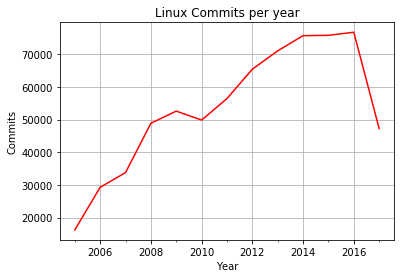

In [13]:
# Setting up plotting in Jupyter notebooks
import matplotlib.pyplot as plt
%matplotlib inline

# plot the data
commits_per_year.plot(
                    kind='line', 
                    title='Linux Commits per year', 
                    legend=False,
                    color='red',
                    grid=True
                    )

plt.xlabel('Year')
plt.ylabel('Commits')
plt.show()

## 9. Conclusion

Thanks to the solid foundation and caretaking of Linux Torvalds, many other developers are now able to contribute to the Linux kernel as well. There is no decrease of development activity at sight!

### Instructions

Thanks for doing the project! As a last task:

* Set year_with_most_commits to the year with the most commits to Linux (as of autumn 2017).

**Further Reading**

If you are more interested in mining software repositories, take a look at the following books:

* Adam Tornhill: Software X-Ray. Pragmatic Programmers, 2018.
* Christian Bird, Tim Menzies, Thomas Zimmermann: The Art and Science of Analyzing Software Data. Morgan Kaufmann, 2015.
* Tim Menzies, Laurie Williams, Thomas Zimmermann: Perspectives on Data Science for Software Engineering. Morgan Kaufmann, 2016.

**Reproducibility**

Thanks to platforms like [GitHub](https://github.com/) or [SourceForge](https://sourceforge.net/), it's easy to analyze the evolution of software projects nowadays. E. g. for this exercise, I cloned the whole Git repository of Linux (~3.6 GB) from GitHub. I copied the repository onto my hard drive with 

![](img/04_090.png)

and (after a few minutes of downloading) exported the history of the relevant information with 

![](img/04_091.png)

that printed out the commit timestamp and the author. Be sure to set an encoding explicitly and to select a separator that doesn't occur in the data.

Note: In rare cases, you'll need to use a non-printable character as separator. I found the "DEVICE CONTROL TWO" Unicode character **U+0012** very useful for this purpose.

**Next Steps**

There are many more parameters you can use with the **--pretty** option of **git log**. Have a look at the [Git documentation](https://git-scm.com/docs/git-log#_pretty_formats) for more details.

If you want to know more about the Linux kernel development in general, you can dive into the [official documentation](https://github.com/torvalds/linux/blob/master/Documentation/process/1.Intro.rst#what-this-document-is-about) and start contributing to one of the most biggest open-source projects ever! :-)

In [14]:
commits_per_year.reset_index(inplace=True)
commits_per_year

,timestamp,author
0,2005-01-01,16229
1,2006-01-01,29255
2,2007-01-01,33759
3,2008-01-01,48847
4,2009-01-01,52572
5,2010-01-01,49819
6,2011-01-01,56403
7,2012-01-01,65389
8,2013-01-01,71001
9,2014-01-01,75642


In [15]:
ts = str(commits_per_year.nlargest(1, 'author').iloc[0][0])
ts

'2016-01-01 00:00:00'

In [16]:
ts_year = ts[0:4]
# calculating or setting the year with the most commits to Linux
year_with_most_commits = int(ts_year)
year_with_most_commits

2016